# Loading Mat files for data set

In [1]:
import numpy
# for repeatability
numpy.random.SeedSequence(4)
import sklearn
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import math
import pandas as pd 
import numpy as np
import os
import re
import math
import random
import scipy
import scipy.io

In [4]:
test = scipy.io.loadmat('testing.mat')
val = scipy.io.loadmat('Validation.mat')
train = scipy.io.loadmat('training.mat')
test_token = []
train_token = []
val_token = []
test_id = test["id"][0]
train_id = train["id"][0]
val_id = val["id"][0]

train_class = []
test_class = []
val_class = []
wordlink = scipy.io.loadmat('word_link.mat')
w = list(wordlink['word']);
wi = list(wordlink['id'][0]);
word_clean = []
word_id = []
for c in w:
    word_clean.append(str(c).strip())
    #print("|"+str(c).strip()+"|")
word_clean.append("null")
for c in wi:
    word_id.append(int(c))
word_id.append(int(c)+1)
print(train["BodyText"][0][0])
for t in train["BodyText"][0]:
    if len(t) == 0:
        print(t)
        train_token.append([])
    else:
        train_token.append(t)
for t in val["BodyText"][0]:
    if len(t) == 0:
        val_token.append([])
    else:
        val_token.append(t)
for t in test["BodyText"][0]:
    if len(t) == 0:
        print(t)
        test_token.append([])
    else:
        test_token.append(t)
for t in train["classifiers"]:
    c = []
    for i in t:
        try:
            c.append(int(i))
        except:
            try:
                c.append(float(i))
            except:
                try:
                    c.append(int(wi[word_clean.index(i)]))
                except: 
                    c.append(int(wi[-1]))
                    print(i)
    train_class.append(c)
for t in val["classifiers"]:
    c = []
    for i in t:
        try:
            c.append(int(i))
        except:
            try:
                c.append(float(i))
            except:
                try:
                    c.append(int(wi[word_clean.index(i)]))
                except: 
                    c.append(int(wi[-1]))
                    print(i)
    val_class.append(c)
for t in test["classifiers"]:
    c = []
    for i in t:
        try:
            c.append(int(i))
        except:
            try:
                c.append(float(i))
            except:
                try:
                    c.append(int(wi[word_clean.index(i)]))
                except: 
                    c.append(int(wi[-1]))
                    print(i)
    test_class.append(c)

print(train_id[0])
print(train_class[2])
print(val_class[0])
print(val_id[0])

['Attached  ' 'are       ' 'two       ' 'files     ' 'that      '
 'illustrate' 'the       ' 'following ' ':         ' 'As        '
 'prices    ' 'rose      ' ',         ' 'supply    ' 'increased '
 'and       ' 'demand    ' 'decreased ' '.         ' 'Now       '
 'prices    ' 'are       ' 'beginning ' 'to        ' 'fall      '
 'in        ' 'response  ' 'these     ' 'market    ' 'responses '
 '.         ']
0
[133, 18, 79, 75, 1, 6, 1, 13, 2]
[403, 1009, 1009, 1009, 1, 7, 8, 28, 4]
0


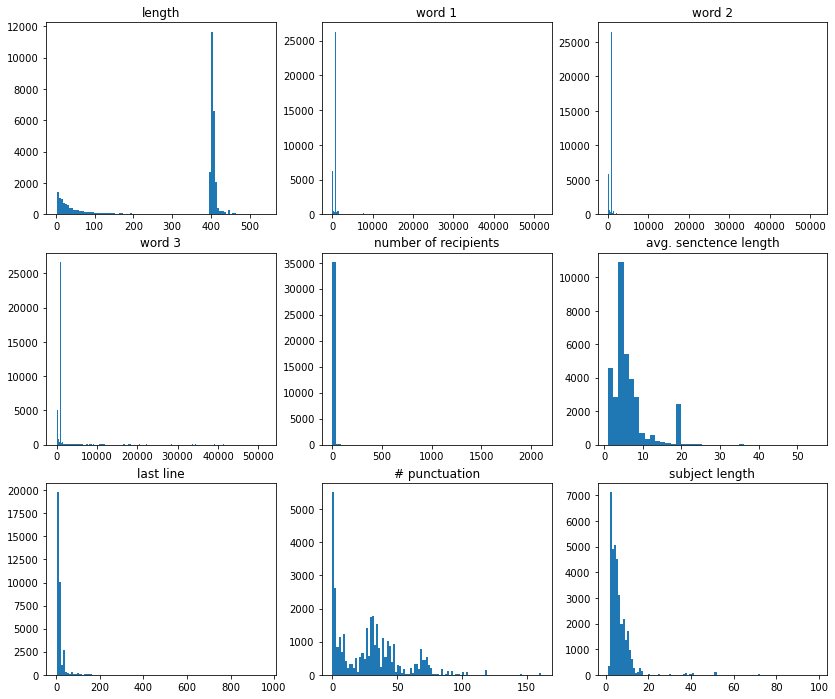

In [44]:
import pylab as pl
df = pd.DataFrame(train_class)
name = ["length","word 1","word 2","word 3","number of recipients","avg. senctence length","last line","# punctuation","subject length"]
bins = [100,200,200,200,50,40,100,100,100]
fig = plt.figure(figsize=(14,12))
for i in range(len(train_class[0])):
    ax = fig.add_subplot(3,3,i+1)
    ax.hist(df[i],bins=bins[i])
    ax.set_title(name[i])

Text(0.5, 0, 'USer ID')

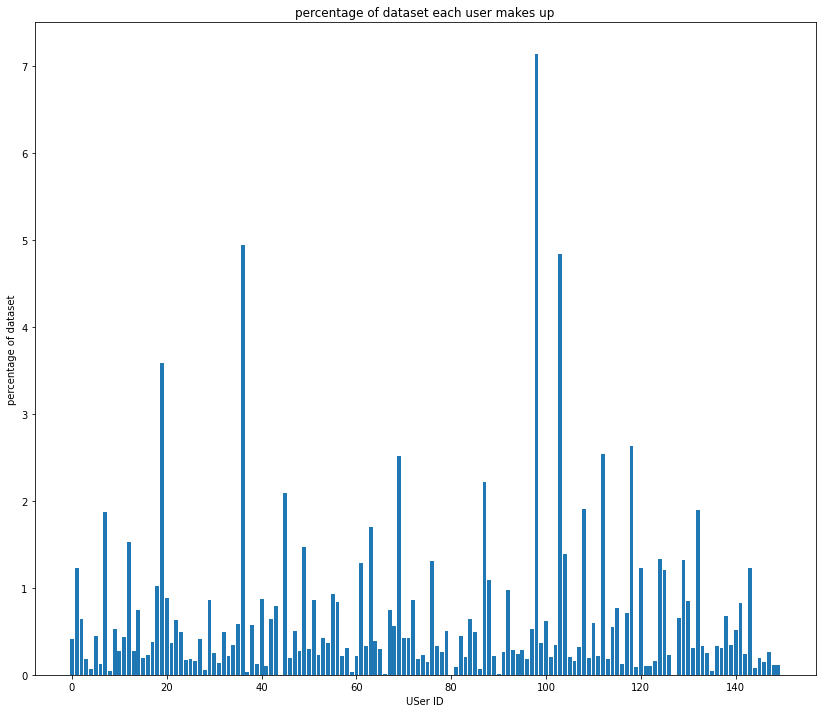

In [50]:
valuesp, countsp = np.unique(train_id, return_counts=True)
counts=counts/len(train_id)*100
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(1,1,1)
ax.bar(valuesp,countsp)
ax.set_title("percentage of dataset each user makes up")
ax.set_ylabel("percentage of dataset")
ax.set_xlabel("USer ID")

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
def eval_model(model, X_train, Y_train, X_test, Y_test,var="", suppress=True,val=False):
    accuracy =[];
    pred = model.predict(X_train)
    acctrue = []
    accuracy.append(f1_score(Y_train,pred, average='weighted'))
    acctrue.append(sum(pred == Y_train)/len(Y_train))
    pred = model.predict(X_test)
    acctrue.append(sum(pred == Y_test)/len(Y_test))
    accuracy.append(f1_score(Y_test,pred,average='weighted'))
    if suppress == False:
        fig, (ax1,ax2)= plt.subplots(1,2,constrained_layout=True,sharey=True,figsize=[25, 8])
        fig.suptitle(var, fontsize=16)
        #ax = fig.add_subplot(1, 2, 1)
        conf = plot_confusion_matrix(model, X_train, Y_train, normalize='true', ax=ax1)
        dataset = "Training"
        if val == True:
            dataset = "Validation"
        t= str(dataset+' Set Performance = '+str(accuracy[0]))
        ax1.set_title(t);
        #ax = fig.add_subplot(1, 2, 2)
        #conf = plot_confusion_matrix(model, X_test, Y_test, normalize='true', ax=ax2)
        dataset = "Validation"
        if val == True:
            dataset = "Test"
        t=str(dataset+' Set Performance = '+str(accuracy[1]))
        ax2.set_title(t);
        print("overall Accuracy:",accuracy)
        print("-----------",dataset,"report------------")
        print(classification_report(Y_test, model.predict(X_test)))
        
        #print("-----------train report-----------")
        #print(classification_report(Y_train, model.predict(X_train)))
    return accuracy, acctrue
    #print('Test Accuracy: ' + str(sum(pred == Y_test)/len(Y_test)))
    #print(classification_report(Y_test, rf.predict(X_test)))
depth = [5,10,13,15,20,21,22,25,30,40,100]
best_n = 0
best_w  =None
best_t_a =0
best_tr_a = 0
for i in depth:
    var = str("n_neighbors= "+str(i))
    cknn = KNeighborsClassifier(n_neighbors=i, weights="distance").fit(train_class,train_id)
    accs, acctrue =eval_model(cknn,train_class,train_id,val_class,val_id)
    print(var+" | ","accuracy:", acctrue, "K1 score:",accs)
    if accs[1]-best_t_a >0.005:
        best_t_a = accs[1]
        best_kn = cknn
        best_n=i
cknn = KNeighborsClassifier(n_neighbors=best_n, weights="distance").fit(train_class,train_id)
eval_model(cknn,train_class,train_id,test_class,test_id,val=False)

n_neighbors= 5 |  accuracy: [0.9915100232835482, 0.7824180895246885] K1 score: [0.9907755825895593, 0.7805836818861334]
n_neighbors= 10 |  accuracy: [0.9915952069964222, 0.7835717581910475] K1 score: [0.9909214236383292, 0.7814917289290836]
n_neighbors= 13 |  accuracy: [0.9916236015673803, 0.7828795569912321] K1 score: [0.9909468161419998, 0.7802754426464977]
n_neighbors= 15 |  accuracy: [0.9916236015673803, 0.7828795569912321] K1 score: [0.9909468161419998, 0.7807466085041492]
n_neighbors= 20 |  accuracy: [0.9916236015673803, 0.7821873557914167] K1 score: [0.9909468161419998, 0.7800648519878771]
n_neighbors= 21 |  accuracy: [0.9916236015673803, 0.7821873557914167] K1 score: [0.9909468161419998, 0.7799823679572407]
n_neighbors= 22 |  accuracy: [0.9916236015673803, 0.7819566220581449] K1 score: [0.9909468161419998, 0.7796667116060093]
n_neighbors= 25 |  accuracy: [0.9916236015673803, 0.7824180895246885] K1 score: [0.9909468161419998, 0.7803058969538885]
n_neighbors= 30 |  accuracy: [0.9

([0.9907755825895593, 0.792301530164843],
 [0.9915100232835482, 0.7931956257594168])

In [159]:
def eval_model(model, X_train, Y_train, X_test, Y_test,var="", suppress=True,val=False):
    accuracy =[];
    pred = model.predict(X_train)
    acctrue = []
    accuracy.append(f1_score(Y_train,pred, average='weighted'))
    print(pred == Y_train)
    acctrue.append(pred)
    pred = model.predict(X_test)
    acctrue.append(pred)
    accuracy.append(f1_score(Y_test,pred,average='weighted'))
    if suppress == False:
        fig, (ax1,ax2)= plt.subplots(1,2,constrained_layout=True,sharey=True,figsize=[25, 8])
        fig.suptitle(var, fontsize=16)
        #ax = fig.add_subplot(1, 2, 1)
        conf = plot_confusion_matrix(model, X_train, Y_train, normalize='true', ax=ax1)
        dataset = "Training"
        if val == True:
            dataset = "Validation"
        t= str(dataset+' Set Performance = '+str(accuracy[0]))
        ax1.set_title(t);
        #ax = fig.add_subplot(1, 2, 2)
        #conf = plot_confusion_matrix(model, X_test, Y_test, normalize='true', ax=ax2)
        dataset = "Validation"
        if val == True:
            dataset = "Test"
        t=str(dataset+' Set Performance = '+str(accuracy[1]))
        ax2.set_title(t);
        print("overall Accuracy:",accuracy)
        print("-----------",dataset,"report------------")
        print(classification_report(Y_test, model.predict(X_test)))
        
        #print("-----------train report-----------")
        #print(classification_report(Y_train, model.predict(X_train)))
    return accuracy, acctrue
    #print('Test Accuracy: ' + str(sum(pred == Y_test)/len(Y_test)))
    #print(classification_report(Y_test, rf.predict(X_test)))
f, a = eval_model(KNeighborsClassifier(n_neighbors=10, weights="distance").fit(train_class,train_id),train_class,train_id,test_class,test_id,val=False)


100
[ True  True  True ...  True  True  True]


129
55


Text(0.5, 0, 'USer ID')

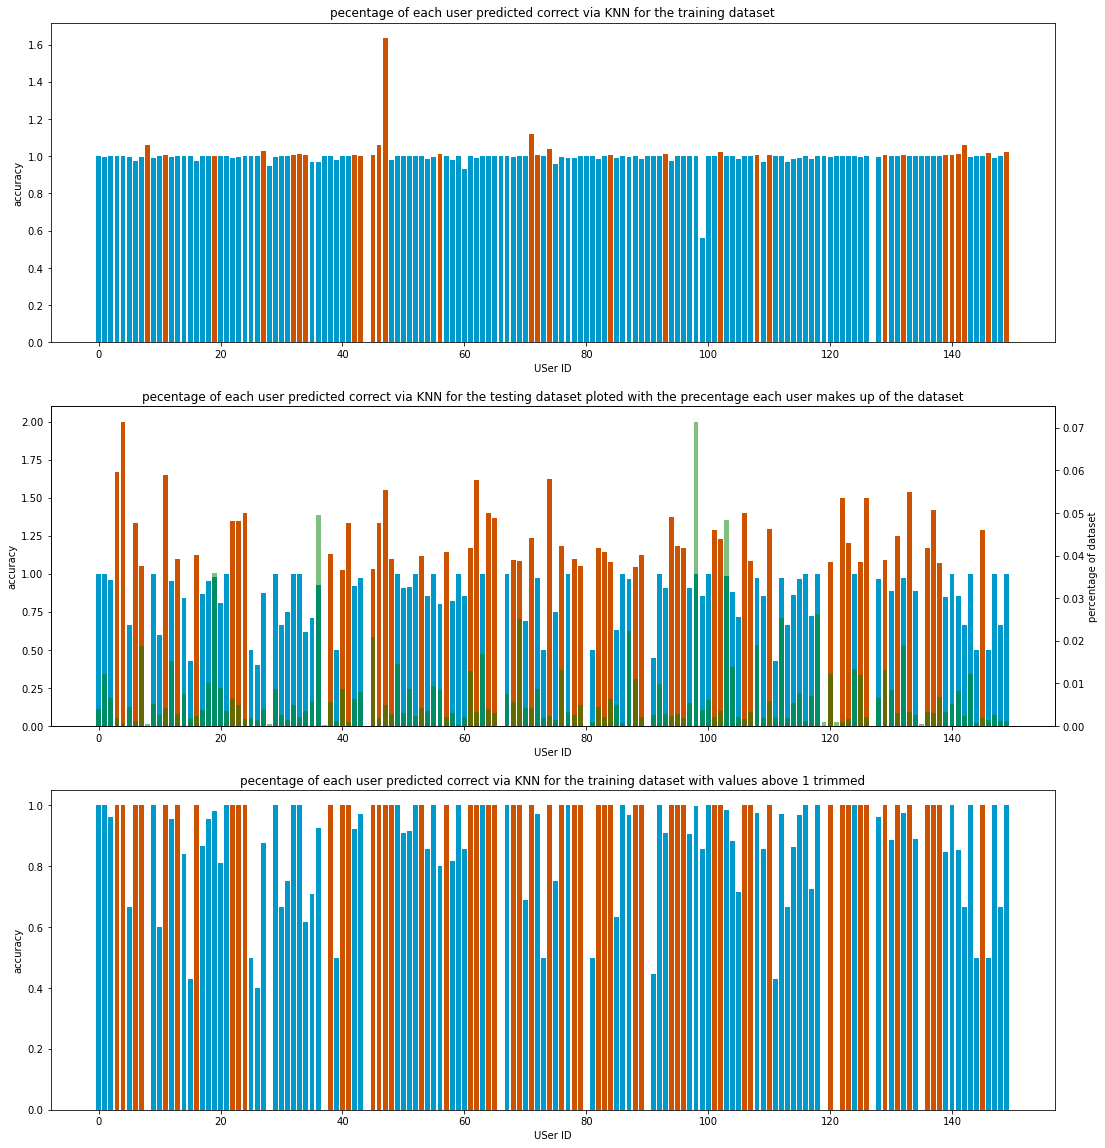

In [176]:
values, counts = np.unique(train_id, return_counts=True)
pvalues, pcounts = np.unique(a[0], return_counts=True)
groupa = []
for i in values:
    if i in pvalues:
        groupa.append((pcounts[np.where(pvalues == i)]/counts[np.where(pvalues == i)])[0])
g = np.array(groupa)
c = np.full(( len(g)), '#0099cc')
c[g>1] = '#cc5200'
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(3,1,1)
ax.bar(values,groupa, color = c)
ax.set_title("pecentage of each user predicted correct via KNN for the training dataset")
ax.set_ylabel("accuracy")
ax.set_xlabel("USer ID")
values, counts = np.unique(test_id, return_counts=True)
pvalues, pcounts = np.unique(a[1], return_counts=True)
groupa = []
va = []
above50 =  0;
for i in pvalues:
    if i in values:
        groupa.append(pcounts[np.where(pvalues == i)][0]/counts[np.where(values == i)][0])
        va.append(i)
        if groupa[-1] > 0.5:
            above50+=1;
print(above50)
g = np.array(groupa)
c = np.full(( len(g)), '#0099cc')
c[g>1] = '#cc5200'
print(sum(g>1))
ax = fig.add_subplot(3,1,2)
ax.bar(va,groupa, color = c)
ax.set_title("pecentage of each user predicted correct via KNN for the testing dataset ploted with the precentage each user makes up of the dataset")
ax.set_ylabel("accuracy")
ax.set_xlabel("USer ID")
ax2=ax.twinx()
valuesp, countsp = np.unique(train_id, return_counts=True)
countsp=countsp/len(train_id)
ax2.bar(valuesp,countsp, color='green',alpha=0.5)
ax2.set_ylabel("percentage of dataset")
ax = fig.add_subplot(3,1,3)
g = np.array(groupa)
g[g> 1] = 1
ax.bar(va,g, color = c)
ax.set_title("pecentage of each user predicted correct via KNN for the training dataset with values above 1 trimmed")
ax.set_ylabel("accuracy")
ax.set_xlabel("USer ID")

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
def eval_model(model, X_train, Y_train, X_test, Y_test,var="", suppress=True,val=False):
    accuracy =[];
    pred = model.predict(X_train)
    acctrue = []
    accuracy.append(f1_score(Y_train,pred, average='weighted'))
    acctrue.append(sum(pred == Y_train)/len(Y_train))
    pred = model.predict(X_test)
    acctrue.append(sum(pred == Y_test)/len(Y_test))
    accuracy.append(f1_score(Y_test,pred,average='weighted'))
    if suppress == False:
        fig, (ax1,ax2)= plt.subplots(1,2,constrained_layout=True,sharey=True,figsize=[25, 8])
        fig.suptitle(var, fontsize=16)
        #ax = fig.add_subplot(1, 2, 1)
        conf = plot_confusion_matrix(model, X_train, Y_train, normalize='true', ax=ax1)
        dataset = "Training"
        if val == True:
            dataset = "Validation"
        t= str(dataset+' Set Performance = '+str(accuracy[0]))
        ax1.set_title(t);
        #ax = fig.add_subplot(1, 2, 2)
        #conf = plot_confusion_matrix(model, X_test, Y_test, normalize='true', ax=ax2)
        dataset = "Validation"
        if val == True:
            dataset = "Test"
        t=str(dataset+' Set Performance = '+str(accuracy[1]))
        ax2.set_title(t);
        print("overall Accuracy:",accuracy)
        print("-----------",dataset,"report------------")
        print(classification_report(Y_test, model.predict(X_test)))
        
        #print("-----------train report-----------")
        #print(classification_report(Y_train, model.predict(X_train)))
    return accuracy, acctrue
    #print('Test Accuracy: ' + str(sum(pred == Y_test)/len(Y_test)))
    #print(classification_report(Y_test, rf.predict(X_test)))

depth = [i for i in range(10,60,10)]
nes = [10,20,30,40,50,100]
#depth = [x for x in range(300,10,500)]
#nes = [x for x in range(300,10,500)]
best_d=0
best_n=0
best_t_a=0
best_rf = None
for d in depth:
    for n in nes:
        var = str('depth= '+str(d)+' | n_est= '+str(n))
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=0,n_jobs=5).fit(train_class,train_id)
        accs, acctrue = eval_model(rf, train_class, train_id, val_class, val_id,var,True)
        print("depth:",d," | estimators:",n," | accuracy:", acctrue, "K1 score:",accs)
        if accs[1]-best_t_a >0.00005:
            best_t_a = accs[1]
            best_d=d
            best_n=n
            best_rf=rf
    print("-------------------------------------------------------------------")
print("best depth =",best_d)
print("best n estimator =",best_n)
print("best test accuracy =",best_t_a)
var = str('depth= '+str(best_d)+' | n_est= '+str(best_n))
eval_model(best_rf,train_class,train_id,test_class, test_id,var,val=False)


depth: 10  | estimators: 10  | accuracy: [0.6573343176784598, 0.6340562990309183] K1 score: [0.6439057584522984, 0.6130268860282768]
depth: 10  | estimators: 20  | accuracy: [0.6959793287523426, 0.6631287494231657] K1 score: [0.6881820616740205, 0.6481277417873866]
depth: 10  | estimators: 30  | accuracy: [0.7013459026634108, 0.6617443470235348] K1 score: [0.696077982937045, 0.6486464609868205]
depth: 10  | estimators: 40  | accuracy: [0.7123629961951274, 0.6723580987540378] K1 score: [0.7093064139717962, 0.6627178426401359]
depth: 10  | estimators: 50  | accuracy: [0.7144074053041058, 0.6730502999538532] K1 score: [0.7132146778133032, 0.6645082832921277]
depth: 10  | estimators: 100  | accuracy: [0.7265602816741439, 0.6818181818181818] K1 score: [0.7280385168531357, 0.6742800591624186]
-------------------------------------------------------------------
depth: 20  | estimators: 10  | accuracy: [0.9501959225396104, 0.7838024919243194] K1 score: [0.9507013365223952, 0.7835856925858096]
d

([0.9932044626775619, 0.8248263803016038],
 [0.993043330115282, 0.8252733900364521])

[ True  True  True ...  True  True  True]
129
129
55


Text(0.5, 0, 'USer ID')

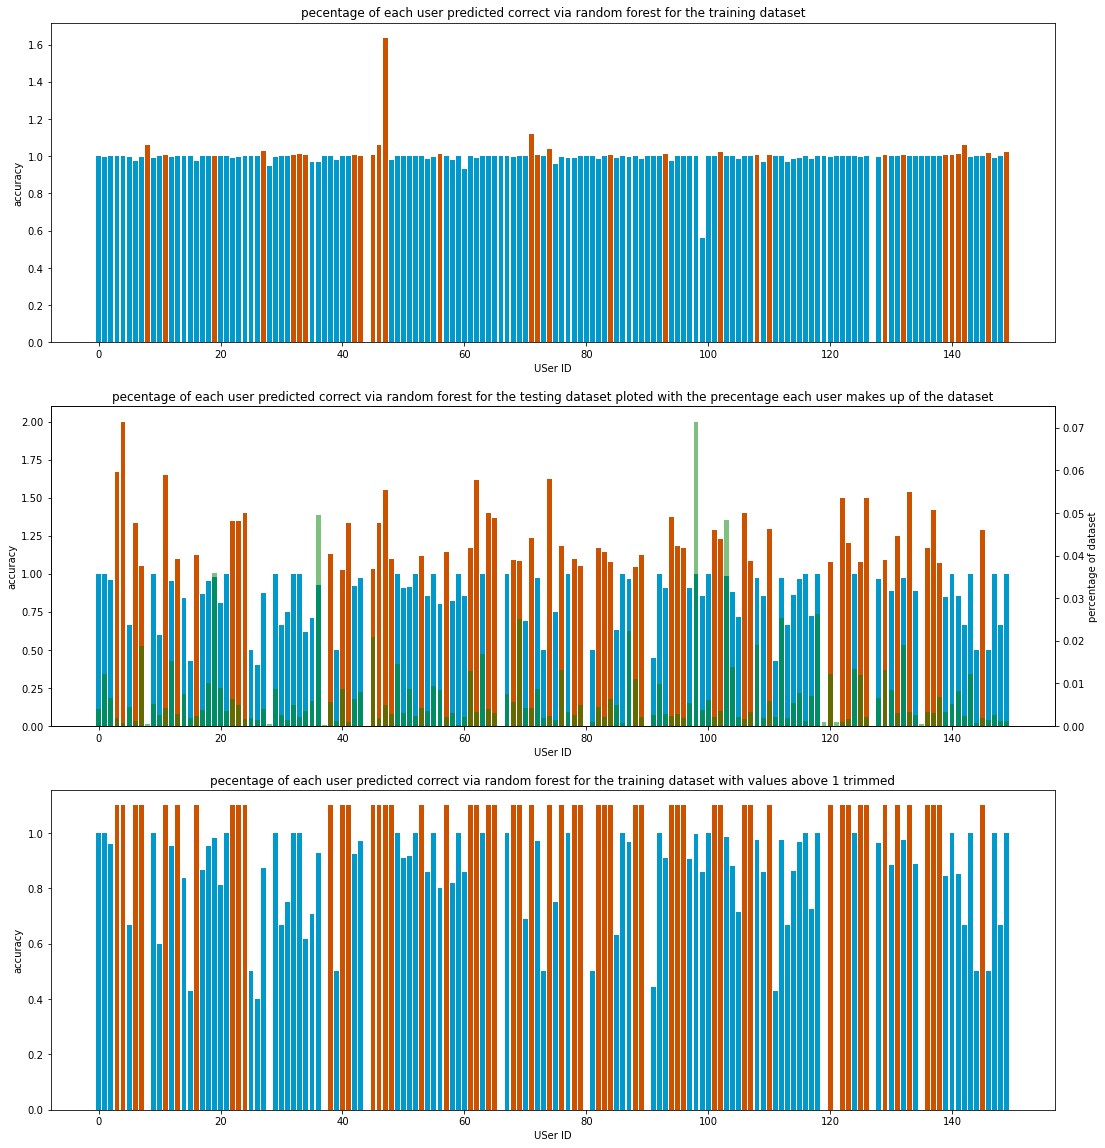

In [181]:
f, a = eval_model(RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0,n_jobs=5).fit(train_class,train_id),train_class,train_id,test_class, test_id,var,val=False)
values, counts = np.unique(train_id, return_counts=True)
pvalues, pcounts = np.unique(a[0], return_counts=True)
groupa = []
for i in values:
    if i in pvalues:
        groupa.append((pcounts[np.where(pvalues == i)]/counts[np.where(pvalues == i)])[0])
g = np.array(groupa)
print(above50)
c = np.full(( len(g)), '#0099cc')
c[g>1] = '#cc5200'
fig = plt.figure(figsize=(18,20))
ax = fig.add_subplot(3,1,1)
ax.bar(values,groupa, color = c)
ax.set_title("pecentage of each user predicted correct via random forest for the training dataset")
ax.set_ylabel("accuracy")
ax.set_xlabel("USer ID")
values, counts = np.unique(test_id, return_counts=True)
pvalues, pcounts = np.unique(a[1], return_counts=True)
groupa = []
va = []
above50=0
for i in pvalues:
    if i in values:
        groupa.append(pcounts[np.where(pvalues == i)][0]/counts[np.where(values == i)][0])
        if groupa[-1] > 0.5:
            above50+=1;
        va.append(i)
g = np.array(groupa)
c = np.full(( len(g)), '#0099cc')
c[g>1] = '#cc5200'
print(above50)
print(sum(g>1))
ax = fig.add_subplot(3,1,2)
ax.bar(va,groupa, color = c)
ax.set_title("pecentage of each user predicted correct via random forest for the testing dataset ploted with the precentage each user makes up of the dataset")
ax.set_ylabel("accuracy")
ax.set_xlabel("USer ID")
ax2=ax.twinx()
valuesp, countsp = np.unique(train_id, return_counts=True)
countsp=countsp/len(train_id)
ax2.bar(valuesp,countsp, color='green',alpha=0.5)
ax2.set_ylabel("percentage of dataset")
ax.set_ylabel("accuracy")
ax.set_xlabel("USer ID")
g = np.array(groupa)
g[g> 1] = 1.1
ax = fig.add_subplot(3,1,3)
ax.bar(va,g, color = c)
ax.set_title("pecentage of each user predicted correct via random forest for the training dataset with values above 1 trimmed")
ax.set_ylabel("accuracy")
ax.set_xlabel("USer ID")

# Data Pre Processing 

In [61]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
direct="Raw emails"
files = os.listdir(direct)
u_id = files;
print(len(files))
class word_count():
    words={}
    word1 = ""
    word2=""
    word3=""
    common=['',' ', '\n', 'and', 'the', 'a', 'i','are']
    def out(self):
        return self.words
    def add(self,word):
        word = word.replace('\n','')
        if (word.lower() in self.words) and (word.lower() not in self.common):
            self.words[word.lower()]+=1
        else:
            self.words[word.lower()] = 1
    def first(self):
        top = 0
        word = ''
        for w in self.words.keys():
            if self.words[w] > top:
                word = w
                top = self.words[w]
        self.word1 = word
        return word
    def second(self):
        top = 0
        word = ''
        for w in self.words.keys():
            if self.words[w] > top and not self.word1 == w :
                word = w
                top = self.words[w]
        self.word2 = word
        return word
    def third(self):
        top = 0
        word = ''
        for w in self.words.keys():
            if self.words[w] > top and not self.word1 == w and not self.word2 == w:
                word = w
                top = self.words[w]
        self.word3 = word
        return word
    def top(self):
        self.first()
        self.second()
        self.third()
        return self.word1, self.word2, self.word3
    def reset(self):
        self.words.clear()
        self.word1 = ""
        self.word2=""
        self.word3=""
class tokiniser():
    token_keys = {}
    count = 0
    def add(self,tk):
        if tk not in self.token_keys:
            self.token_keys[tk] = self.count
            self.count+=1
    def output(self):
        return self.token_keys
    def length(self):
        return self.count
    def keys(self):
        return self.token_keys.keys()
    def get(self,tk):
        return self.token_keys[tk]
    def reset(self):
        oken_keys = {}
        count = 0
user_ids = tokiniser();
for i in files:
    user_ids.add(i)
processed_emails = []
stop = ' -----Original Message-----';
stop2 = '---------------------- Forward';
start = 'X-FileName:'
toline = 'X-To:'
subject_line = 'Subject:'
words = tokiniser()
email_class = []
email_tokins = []
email_id = []
for u in u_id:
    print(user_ids.get(u))
    email_class_u=[]
    email_tokins_u=[]
    email_id_u=[]
    folders = os.listdir(direct+'/'+u)
    for f in folders:
        if (f.find("sent")>=0):
            emails =  os.listdir(direct+'/'+u+'/'+f)
            classifiers = {"length":0,"word1":"none","word2":"none","word3":"none","num_rec":0,"senctence":0,"last_line":"","punctuation":0,"subject_len":0}
            token_email = []
            email_length = 0
            finish=False
            begin = False
            avg_senc =0
            num_senc = 0
            topwords = word_count()
            last_line = ""
            senc_len=0
            punc = 0
            topwords.reset()
            email_num = 0;
            for e in emails:
                if email_num < 50:
                    topwords.reset()
                    classifiers = {"length":0,"word1":"none","word2":"none","word3":"none","num_rec":0,"senctence":0,"last_line":"","punctuation":0,"subject_len":0}
                    token_email = []
                    email_length = 0
                    finish=False
                    begin = False
                    avg_senc =0
                    num_senc = 0
                    topwords = word_count()
                    last_line = ""
                    senc_len=0
                    punc = 0
                    word_length = 0
                    try:
                        email = open(direct+'/'+u+'/'+f+'/'+e, 'r').readlines()
                    except:
                        print("error reading")
                        email=""
                    for line in email:
                        if line.find(subject_line)>=0:

                            classifiers['subject_len'] = len(line.replace(subject_line,"").split(" "))
                        if line.find(toline)>=0:
                            to = line.split(',')
                            classifiers["num_rec"]  =len(to)
                        if (line.find(stop)>=0) or (line.find(stop2)>=0) or word_length >=400:
                            finish = True
                            if len(token_email) > 0:
                                w1,w2,w3 = topwords.top()
                                words.add(w1.strip())
                                classifiers["word1"] = words.get(w1.strip())
                                words.add(w2.strip())
                                classifiers["word2"] =words.get(w2.strip())
                                words.add(w3.strip())
                                classifiers["word3"] = words.get(w3.strip())
                                topwords.reset()
                                classifiers["length"] = email_length
                                if num_senc > 0:
                                    classifiers["senctence"] = senc_len/num_senc
                                classifiers["last_line"] = len(last_line.split(' '))
                                classifiers['punctuation'] = punc

                                email_class_u.append(list(classifiers.values()))
                                email_tokins_u.append(token_email)
                                email_id_u.append(user_ids.get(u))
                        if begin == True and finish == False and not line == '\n':

                            line_words = word_tokenize(line)
                            line_senc = line.split(".")
                            num_senc = num_senc+len(line_senc)
                            last_line = line
                            for sence in line_senc:
                                senc_len=senc_len+len(sence.split(" "))
                            email_length=email_length+len(line_words)
                            for w in line_words:
                                ws = w.strip()
                                if (ws == '.') or (ws == ',') or (ws == '?') or (ws == '!') or (ws == ';'):
                                    punc=punc+1
                                if not ws.strip() == "":
                                    word_length+=1
                                    words.add(ws.strip())
                                    topwords.add(ws.strip())
                                    token_email.append(ws.strip())

                        if line.find(start)>=0:
                            begin=True
                    if finish == False:
                        finish = True
                        if len(token_email) > 0:
                            w1,w2,w3 = topwords.top()
                            words.add(w1.strip())
                            classifiers["word1"] = words.get(w1.strip())
                            words.add(w2.strip())
                            classifiers["word2"] =words.get(w2.strip())
                            words.add(w3.strip())
                            classifiers["word3"] = words.get(w3.strip())
                            topwords.reset()
                            classifiers["length"] = email_length
                            if num_senc > 0:
                                classifiers["senctence"] = senc_len/num_senc
                            classifiers["last_line"] = len(last_line.split(' '))
                            classifiers['punctuation'] = punc

                            email_class_u.append(list(classifiers.values()))
                            email_tokins_u.append(token_email)
                            email_id_u.append(user_ids.get(u))
                email_num+=1
    email_class.append(email_class_u)
    email_tokins.append(email_tokins_u)
    email_id.append(email_id_u)    
print(len(email_id))
print(len(email_class))             


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\polit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


150
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
150


In [63]:
print(email_tokins[0][0])

['Attached', 'are', 'two', 'files', 'that', 'illustrate', 'the', 'following', ':', 'As', 'prices', 'rose', ',', 'supply', 'increased', 'and', 'demand', 'decreased', '.', 'Now', 'prices', 'are', 'beginning', 'to', 'fall', 'in', 'response', 'these', 'market', 'responses', '.']


In [64]:
email_class_test = []
email_class_train = []
email_class_val = []
email_tokens_test = []
email_tokens_train = []
email_tokens_val = []
email_id_val = []
email_id_test = []
email_id_train = []
email_tokens = email_tokins
print(len(email_tokens))
u_index = 0
both = 0
for u in email_id:
    both+=len(u)
    if len(u) > 2 and len(email_class[u_index]) > 2:
        indexs = random.sample(range(0,len(u)),math.floor(len(u)*0.2))
        if len(indexs) > 2:
            indexs_val = indexs[0:math.floor(len(indexs)/2)]
            indexs_test = indexs[math.floor(len(indexs)/2)+1:-1]
            if isinstance(indexs_val, int):
                indexs_val = [indexs_val,]
            if isinstance(indexs_test, int):
                indexs_test = [indexs_test,]
        elif len(indexs) == 2:
            indexs_val = [indexs[0],]
            indexs_test = [indexs[1],]
        else:
            indexs = random.sample(range(0,len(u)),2)
            indexs_val = [indexs[0],]
            indexs_test = [indexs[1],]
        for i in indexs_test:
            email_class_test.append(email_class[u_index][i])
            email_tokens_test.append(email_tokens[u_index][i])
            email_id_test.append(email_id[u_index][i])
        for i in indexs_val:
            email_class_val.append(email_class[u_index][i])
            email_tokens_val.append(email_tokens[u_index][i])
            email_id_val.append(email_id[u_index][i])
        for i in range(0,len(u)):
            if i not in indexs:
                email_class_train.append(email_class[u_index][i])
                email_tokens_train.append(email_tokens[u_index][i])
                email_id_train.append(email_id[u_index][i])
    u_index +=1
print(len(email_id_train))
print(email_tokens_test[0])
print(len(email_id_test))
print(both)
print(len(email_id_test)+len(email_id_train))
print("class:",email_class_train[0])
scipy.io.savemat('testing.mat', {"id": numpy.array(email_id_test),"BodyText": email_tokens_test,"classifiers": email_class_test})
scipy.io.savemat('Validation.mat', {"id": numpy.array(email_id_val),"BodyText": email_tokens_val,"classifiers": email_class_val})
scipy.io.savemat('training2.mat', {"id": numpy.array(email_id_train),"BodyText": email_tokens_train,"classifiers": email_class_train})

150
35218
['Greg', ',', 'I', 'noticed', 'in', 'the', 'san', 'macos', 'record', 'that', 'some', 'zoning', 'changes', 'were', 'underway', '.', '=', 'First', ',', 'I', 'wanted', 'to', 'make', 'sure', 'our', 'property', 'would', 'not', 'be', 'affected', '.', 'Second', ',', 'p=', 'art', 'of', 'the', 'land', 'that', 'is', 'being', 'rezoned', 'is', 'targeted', 'for', '``', 'seniors', "''", '.', 'I', 'would', 'l=', 'ike', 'to', 'explore', 'the', 'possibility', 'of', 'developing', 'a', 'seniors', 'project', '(', 'not', 'assist=', 'ed', 'living', ')', '.', 'Maybe', 'we', 'could', 'look', 'at', 'the', 'property', 'mentioned', 'below', '.', 'As', 'I', 'hav=', 'e', 'mentioned', ',', 'my', 'goal', 'is', 'to', 'invest', 'around', '$', '2', 'million', 'in', 'real', 'estate', 'over', 'th=', 'e', 'next', 'two', 'years', '.', 'At', 'the', 'current', 'rate', 'that', 'amount', 'would', 'cover', 'the', 'equity', 'r=', 'equirements', 'for', '4', 'projects', 'assuming', 'I', 'continued', 'to', 'have', 'minori

In [57]:
f = open("trainbody.csv", "a")
for i in email_tokens_train[0:int(np.floor(len(email_tokens_train)/2))]:
    q = 0;
    for w in i:
        f.write(w)
        if not q >= len(i):
            f.write(",")
        q+=1;
    f.write("\n")
f.close()
f = open("trainbody2.csv", "a")
for i in email_tokens_train[int(np.floor(len(email_tokens_train)/2)+1):-1]:
    q = 0;
    for w in i:
        f.write(w)
        if not q >= len(i):
            f.write(",")
        q+=1;
    f.write("\n")
f.close()
scipy.io.savemat('training.mat', {"id": numpy.array(email_id_train),"classifiers": email_class_train})
#scipy.io.savemat('training2.mat', {"id": numpy.array(email_id_train[0:len(email_id_train)/2]),"BodyText": email_tokens_train,"classifiers": email_class_train})
print("end")

end


In [72]:
user_out = user_ids.output()
scipy.io.savemat('user_link.mat', {"id": list(user_out.values()),"name": list(user_out.keys())})

In [73]:
words_out = words.output()
scipy.io.savemat('word_link.mat', {"id": list(words_out.values()),"word": list(words_out.keys())})

In [71]:
qqq=0
for i in email_class:
    if len(i) == 0:
        print(qqq, i)
    qqq+=1
amount = 0;
for u in email_id:
    if len(u) > 2:
        amount+=len(u)
maxp = 0
over1 = 0
total_acc = 0
overclasses =[]
maxclass = 0
for u in email_id:
    if len(u) > 0:
        print("id:",u[-1]," | email size:",len(u)," |",len(u)/amount*100,"%") 
        if len(u)/amount*100 >= 1:
            over1+=1;
            total_acc+=len(u)/amount*100
            overclasses.append(u[0])
        if len(u)/amount*100 > maxp:
            maxp = len(u)/amount*100
            maxclass=u[0]
print(maxp)
print(over1)
print(total_acc)
print(overclasses)
print(maxclass)
print(28/150*100)

44 []
127 []
id: 0  | email size: 181  | 0.41180351739357957 %
id: 1  | email size: 540  | 1.2285850795167566 %
id: 2  | email size: 284  | 0.6461447455236276 %
id: 3  | email size: 80  | 0.18201260437285283 %
id: 4  | email size: 29  | 0.06597956908515915 %
id: 5  | email size: 197  | 0.4482060382681501 %
id: 6  | email size: 52  | 0.11830819284235432 %
id: 7  | email size: 822  | 1.8701795099310625 %
id: 8  | email size: 19  | 0.04322799353855254 %
id: 9  | email size: 232  | 0.5278365526812732 %
id: 10  | email size: 118  | 0.2684685914499579 %
id: 11  | email size: 189  | 0.43000477783086477 %
id: 12  | email size: 673  | 1.5311810342866243 %
id: 13  | email size: 121  | 0.2752940641139399 %
id: 14  | email size: 329  | 0.7485268354833572 %
id: 15  | email size: 86  | 0.19566354970081676 %
id: 16  | email size: 102  | 0.23206607057538733 %
id: 17  | email size: 166  | 0.3776761540736696 %
id: 18  | email size: 447  | 1.0169954269333152 %
id: 19  | email size: 1578  | 3.590198621254